In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [2]:
clean_in = pd.read_csv(r"D:\KE Notes\Clinical Health Analytics\CA\cleaned_input.csv")
smote_dic = pd.read_csv(r"D:\KE Notes\Clinical Health Analytics\CA\smote_dict.csv")
#clean_dic = pd.read_csv(r"D:\KE Notes\Clinical Health Analytics\CA\clean_dict.csv") 
clean_in.head(5)

,Age,Sex,Ht,Wt,QRS_dur,P-R_int,Q-T_int,T_int,P_int,QRS_vect_ang,...,V6_Amp_Q,V6_Amp_R,V6_Amp_S,V6_Amp_R',V6_Amp_S',V6_Amp_P,V6_Amp_T,V6_QRSA,V6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,11


In [3]:
count = 0
for col in smote_dic.col_name:
    if clean_in[col].nunique() == 1:
        print(col)
        clean_in = clean_in.drop(col,axis=1)
        count = count + 1
print(clean_in.shape)
print(count)


DI_avg_wd_S'
DI_ex_rag_R
DIII_ex_dip_der_T
AVL_avg_wd_S'
AVL_ex_rag_R
AVL_ex_rag_P
AVL_ex_dip_der_T
AVF_ex_rag_P
AVF_ex_dip_der_P
V4_ex_rag_P
V4_ex_dip_der_P
V5_avg_wd_S'
V5_ex_rag_R
V5_ex_rag_P
V5_ex_rag_T
V6_avg_wd_S'
V6_ex_dip_der_P
V6_ex_rag_T
DI_Amp_S'
AVL_Amp_S'
V5_Amp_S'
V6_Amp_S'
(418, 257)
22


In [4]:
input = clean_in
for i in range(input.shape[0]):
    if input.loc[i,"class"] == 1:
        input.loc[i,"class"]= 0 
    if input.loc[i,"class"] > 1:
        input.loc[i,"class"]= 1
#class - 1 is abnormal and 0 is normal

In [5]:
input.groupby("class").count().Age

class
0    237
1    181
Name: Age, dtype: int64

In [6]:
input_x = input.drop("class",axis=1)
input_y = input["class"]

In [7]:
# splitting the train and test data
train_size = 0.8
test_size = 1 - train_size
train_x,test_x,train_y,test_y = train_test_split(input_x,input_y,train_size=train_size,test_size=test_size,random_state=500)
# using min-max scaler to standardise the data
minmax = MinMaxScaler(feature_range=(0,1),copy=True)
TRAIN_X = pd.DataFrame(minmax.fit_transform(train_x),columns=train_x.columns)
TEST_X = pd.DataFrame(minmax.transform(test_x),columns=test_x.columns)

In [8]:
# comment/uncomment if all variables are to be (not used/used) in the models
f_train_x = TRAIN_X
f_test_x = TEST_X

In [9]:
# Hyper tuned parameters to obtain the below values for every model
# 1. XGBClassifier 
# train = 0.9 - {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'n_estimators': 100}
# train = 0.8 - {'colsample_bytree': 0.7, 'gamma': 0.001, 'learning_rate': 0.1, 'n_estimators': 100}
# train = 0.7 - {'colsample_bytree': 0.2, 'gamma': 0.1, 'learning_rate': 0.1, 'n_estimators': 100}

# 2.RandomForestClassifier 
# Gridsearch results for RF
# train = 0.9 - {'random_state': 260, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
# train = 0.8 - {'random_state': 99, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
# train = 0.7 - {'random_state': 60, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}

# 3. GradientBoostingClassifier 
# Gridsearch results for GB
# train = 0.9 - {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}
# train = 0.8 - {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100} 
# train = 0.7 - {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 1000}

# 4. LogisticRegression 
# Gridsearch results for LR
# train = 0.9 - {'C': 1, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.0001}
# train = 0.8 - {'C': 10, 'max_iter': 10, 'penalty': 'l2', 'tol': 0.1}
# train = 0.7 - {'C': 1000, 'max_iter': 10, 'penalty': 'l1', 'tol': 0.0001}

# 5. SupportVectorMachine 
# Gridsearch results for SVM
# train = 0.9 - {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
# train = 0.8 - {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
# train = 0.7 - {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

# 6. Bagging Decision tree
# Gridsearch results for tbg
# train = 0.9 - NA
# train = 0.8 - {'max_samples': .9}
# train = 0.7 - NA

# 7. Bagging svm
# Gridsearch results for tbg
# train = 0.9 - NA
# train = 0.8 - {'max_samples': .1}
# train = 0.7 - NA

# 8. Bagging LR
# Gridsearch results for tbg
# train = 0.9 - NA
# train = 0.8 - {'max_samples': .9}
# train = 0.7 - NA

In [10]:
# THIS IS ONLY for THE 80-20 split
model_svm = SVC(C=1,gamma=1,kernel='rbf',probability=True)
model_lr = LogisticRegression(C=10,max_iter=10,penalty='l2',tol=0.1)
model_gb = GradientBoostingClassifier(random_state=48,learning_rate=0.1,max_depth=5,min_samples_leaf=3,
                                      min_samples_split=10,n_estimators=100)
#model_gb = GradientBoostingClassifier(random_state=65,learning_rate=0.1,max_depth=5,min_samples_leaf=3,
#                                      min_samples_split=10,n_estimators=100)
model_rf = RandomForestClassifier(random_state=31,max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=1000)
#model_rf = RandomForestClassifier(random_state=99,max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=1000)
model_xgb = XGBClassifier(random_state=6,colsample_bytree=0.7,gamma=0.001,learning_rate=0.1,n_estimators=100)
#model_xgb = XGBClassifier(random_state=65,colsample_bytree=0.7,gamma=0.001,learning_rate=0.1,n_estimators=100)
tree_bg = BaggingClassifier(DecisionTreeClassifier(),n_estimators=1000,random_state=8,max_samples=0.9)
#tree_bg = BaggingClassifier(DecisionTreeClassifier(),n_estimators=1000,random_state65,max_samples=0.9)
svm_bg = BaggingClassifier(model_svm,n_estimators=1000,random_state=65,max_samples=0.1)
#svm_bg = BaggingClassifier(model_svm,n_estimators=1000,random_state=65,max_samples=0.1)
lr_bg = BaggingClassifier(model_lr,n_estimators=1000,random_state=8,max_samples=0.9)
#lr_bg = BaggingClassifier(model_lr,n_estimators=1000,random_state=65,max_samples=0.9)

In [11]:
# model fitting
model_svm.fit(f_train_x,train_y)
print(model_svm)
model_lr.fit(f_train_x,train_y)
print(model_lr)
model_gb.fit(f_train_x,train_y)
print(model_gb)
model_rf.fit(f_train_x,train_y)
print(model_rf)
model_xgb.fit(f_train_x,train_y)
print(model_xgb)
tree_bg.fit(f_train_x,train_y)
print(tree_bg)
svm_bg.fit(f_train_x,train_y)
print(svm_bg)
lr_bg.fit(f_train_x,train_y)
print(lr_bg)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=48, subsample=1.0, verbose=0,
              warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=N

In [12]:
# train predictions
rf_tr_y = pd.DataFrame(model_rf.predict(f_train_x))
lr_tr_y = pd.DataFrame(model_lr.predict(f_train_x))
svm_tr_y = pd.DataFrame(model_svm.predict(f_train_x))
gb_tr_y = pd.DataFrame(model_gb.predict(f_train_x))
xgb_tr_y = pd.DataFrame(model_xgb.predict(f_train_x))
tbg_tr_y = pd.DataFrame(tree_bg.predict(f_train_x))
sbg_tr_y = pd.DataFrame(svm_bg.predict(f_train_x))
lbg_tr_y = pd.DataFrame(lr_bg.predict(f_train_x))

# test predictions
rf_y = pd.DataFrame(model_rf.predict(f_test_x))
lr_y = pd.DataFrame(model_lr.predict(f_test_x))
svm_y = pd.DataFrame(model_svm.predict(f_test_x))
gb_y = pd.DataFrame(model_gb.predict(f_test_x))
xgb_y = pd.DataFrame(model_xgb.predict(f_test_x))
tbg_y = pd.DataFrame(tree_bg.predict(f_test_x))
sbg_y = pd.DataFrame(svm_bg.predict(f_test_x))
lbg_y = pd.DataFrame(lr_bg.predict(f_test_x))

C:\Users\Viknesh Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Viknesh Kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
# train predictions with probability
pr_rf_tr_y = model_rf.predict_proba(f_train_x)
pr_lr_tr_y = model_lr.predict_proba(f_train_x)
pr_svm_tr_y = model_svm.predict_proba(f_train_x)
pr_gb_tr_y = model_gb.predict_proba(f_train_x)
pr_xgb_tr_y = model_xgb.predict_proba(f_train_x)
pr_tbg_tr_y = tree_bg.predict_proba(f_train_x)
pr_sbg_tr_y = svm_bg.predict_proba(f_train_x)
pr_lbg_tr_y = lr_bg.predict_proba(f_train_x)

# test predictions with probability
pr_rf_y = model_rf.predict_proba(f_test_x)
pr_lr_y = model_lr.predict_proba(f_test_x)
pr_svm_y = model_svm.predict_proba(f_test_x)
pr_gb_y = model_gb.predict_proba(f_test_x)
pr_xgb_y = model_xgb.predict_proba(f_test_x)
pr_tbg_y = tree_bg.predict_proba(f_test_x)
pr_sbg_y = svm_bg.predict_proba(f_test_x)
pr_lbg_y = lr_bg.predict_proba(f_test_x)

In [141]:
final_output = pd.concat((pd.DataFrame(pr_rf_y),
           pd.DataFrame(pr_lr_y),
           pd.DataFrame(pr_svm_y),
           pd.DataFrame(pr_gb_y),
           pd.DataFrame(pr_xgb_y),
           pd.DataFrame(pr_tbg_y),
           pd.DataFrame(pr_sbg_y),
           pd.DataFrame(pr_lbg_y),
           pd.DataFrame(np.array(test_y))),axis=1)
#dummy.columns = ['rf','lr','svm','gb','xgb','tbg','sbg','lbg','actual']
final_output.to_csv(r'D:\KE Notes\Clinical Health Analytics\CA\final_output.csv',index=None)

In [14]:
print("Random Forest\n")
print(confusion_matrix(test_y,rf_y))
print(classification_report(test_y,rf_y))
print(accuracy_score(test_y,rf_y))
print("\nLogistic Regression\n")
print(confusion_matrix(test_y,lr_y))
print(classification_report(test_y,lr_y))
print(accuracy_score(test_y,lr_y))
print("\nGradient Boosting Trees\n")
print(confusion_matrix(test_y,gb_y))
print(classification_report(test_y,gb_y))
print(accuracy_score(test_y,gb_y))
print("\nSupport Vector Machine\n")
print(confusion_matrix(test_y,svm_y))
print(classification_report(test_y,svm_y))
print(accuracy_score(test_y,svm_y))
print("\nXGBoost\n")
print(confusion_matrix(test_y,xgb_y))
print(classification_report(test_y,xgb_y))
print(accuracy_score(test_y,xgb_y))
print("\nBagging Decision tree\n")
print(confusion_matrix(test_y,tbg_y))
print(classification_report(test_y,tbg_y))
print(accuracy_score(test_y,tbg_y))
print("\nBagging-SVM\n")
print(confusion_matrix(test_y,sbg_y))
print(classification_report(test_y,sbg_y))
print(accuracy_score(test_y,sbg_y))
print("\nBagging-LogisticReg\n")
print(confusion_matrix(test_y,lbg_y))
print(classification_report(test_y,lbg_y))
print(accuracy_score(test_y,lbg_y))

Random Forest

[[55  5]
 [ 5 19]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        60
          1       0.79      0.79      0.79        24

avg / total       0.88      0.88      0.88        84

0.8809523809523809

Logistic Regression

[[45 15]
 [ 6 18]]
             precision    recall  f1-score   support

          0       0.88      0.75      0.81        60
          1       0.55      0.75      0.63        24

avg / total       0.79      0.75      0.76        84

0.75

Gradient Boosting Trees

[[57  3]
 [ 5 19]]
             precision    recall  f1-score   support

          0       0.92      0.95      0.93        60
          1       0.86      0.79      0.83        24

avg / total       0.90      0.90      0.90        84

0.9047619047619048

Support Vector Machine

[[39 21]
 [ 6 18]]
             precision    recall  f1-score   support

          0       0.87      0.65      0.74        60
          1       0.46      0.75      0.5

C:\Users\Viknesh Kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        60
          1       0.79      0.79      0.79        24

avg / total       0.88      0.88      0.88        84

0.8809523809523809


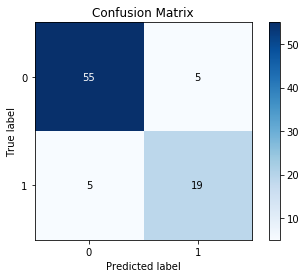

In [15]:
x_train_stack = pd.concat([rf_tr_y,#lr_tr_y,svm_tr_y,
                           #gb_tr_y,
                           xgb_tr_y,tbg_tr_y,#sbg_tr_y,
                           lbg_tr_y],axis=1)
x_train_stack.columns = ['rf',#'lr','svm','gb',
                         'xgb','tbg',#'sbg',
                         'lbg']
x_test_stack = pd.concat([rf_y,#lr_y,svm_y,
                          #gb_y,
                          xgb_y,tbg_y,#sbg_y,
                          lbg_y],axis=1)
x_test_stack.columns = ['rf',#'lr','svm',
                        #'gb',
                        'xgb','tbg',#'sbg',
                        'lbg']
# stacking using Logistic Regression
lr_stack = LogisticRegression()
lr_stack.fit(x_train_stack,train_y)
stack_out = lr_stack.predict(x_test_stack)
print(lr_stack)
skplt.metrics.plot_confusion_matrix(test_y,stack_out)
print(classification_report(test_y,stack_out))
print(accuracy_score(test_y,stack_out))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94        60
          1       0.90      0.79      0.84        24

avg / total       0.92      0.92      0.91        84

0.9166666666666666


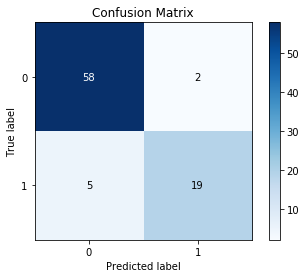

In [16]:
# Maximum voting - cos rounding the average above 0.5 which is maximum voting
d = ((#gb_y+#svm_y+lr_y+
      rf_y+xgb_y+tbg_y+
      #sbg_y+
    lbg_y)/4).round()
#d = ((xgb_y+gb_y+rf_y)/3).round()
#d = ((gb_y+lr_y+rf_y)/3).round()
skplt.metrics.plot_confusion_matrix(test_y,d)
print(classification_report(test_y, d))
print(accuracy_score(test_y, d))

             precision    recall  f1-score   support

          0       0.92      0.93      0.93        60
          1       0.83      0.79      0.81        24

avg / total       0.89      0.89      0.89        84

0.8928571428571429


C:\Users\Viknesh Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


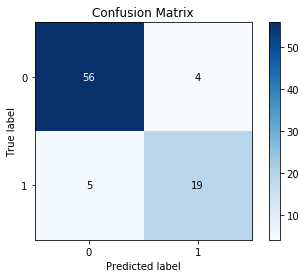

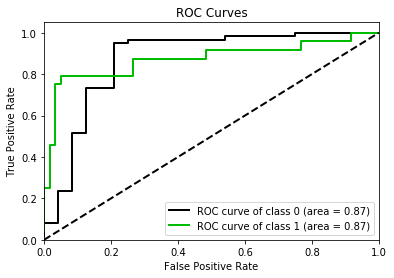

In [17]:
d = (#pr_gb_y + 
    pr_xgb_y + pr_rf_y + #pr_lr_y + pr_svm_y + 
            pr_tbg_y + #pr_sbg_y + 
    pr_lbg_y)
dd = np.argmax(d,axis=1)
skplt.metrics.plot_confusion_matrix(test_y,dd)
print(classification_report(test_y, dd))
print(accuracy_score(test_y, dd))
skplt.metrics.plot_roc_curve(test_y,d,curves='each_class')

C:\Users\Viknesh Kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


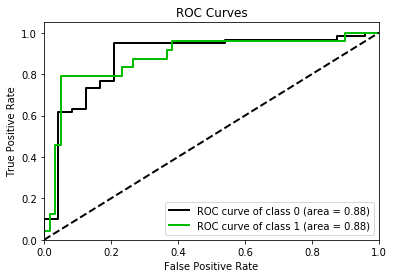

In [246]:
skplt.metrics.plot_roc_curve(test_y, pr_gb_y,curves=('each_class'))
plt.show()

In [21]:
# GRID SEARCH CODE
param_grid={
            'alpha' : [.0001],
            'hidden_layer_sizes' : [(100,50,25,),(500,250,50)],
            'max_iter': [200,500,1000]
}
mlp = MLPClassifier()
clf_mlp = GridSearchCV(mlp,param_grid,scoring='accuracy',n_jobs=7,cv=3)
clf_mlp.fit(f_train_x,train_y)
print(clf_mlp.best_params_)
clf_mlp.grid_scores_

{'alpha': 0.0001, 'hidden_layer_sizes': (500, 250, 50), 'max_iter': 500}


C:\Users\Viknesh Kumar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.70659, std: 0.05471, params: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 200},
 mean: 0.72156, std: 0.05886, params: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 500},
 mean: 0.73353, std: 0.02827, params: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50, 25), 'max_iter': 1000},
 mean: 0.72455, std: 0.03158, params: {'alpha': 0.0001, 'hidden_layer_sizes': (500, 250, 50), 'max_iter': 200},
 mean: 0.75150, std: 0.01842, params: {'alpha': 0.0001, 'hidden_layer_sizes': (500, 250, 50), 'max_iter': 500},
 mean: 0.73353, std: 0.02129, params: {'alpha': 0.0001, 'hidden_layer_sizes': (500, 250, 50), 'max_iter': 1000}]

In [10]:
MLPClassifier()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [42]:
#hidden_layer_sizes=(100,100,) - 40
#gb_feat_sel = pd.read_csv(r'D:\KE Notes\Clinical Health Analytics\CA\feat_80.csv',header=None)
#f_train_x=TRAIN_X[gb_feat_sel.set_index(0).index]
#print(TRAIN_X[gb_feat_sel.set_index(0).index].shape)
#f_test_x=TEST_X[gb_feat_sel.set_index(0).index]
#print(TEST_X[gb_feat_sel.set_index(0).index].shape)
mlp = MLPClassifier(hidden_layer_sizes=(500, 250, 50),max_iter=500,activation='relu',random_state=459)
mlp.fit(f_train_x,train_y)
mlp_y = mlp.predict(f_test_x)
pr_mlp_y = mlp.predict_proba(f_test_x)
print(confusion_matrix(test_y,mlp_y))
print(classification_report(test_y,mlp_y))
print(accuracy_score(test_y,mlp_y))

[[56  4]
 [ 9 15]]
             precision    recall  f1-score   support

          0       0.86      0.93      0.90        60
          1       0.79      0.62      0.70        24

avg / total       0.84      0.85      0.84        84

0.8452380952380952


In [43]:
# calculate the fpr and tpr for all thresholds of the classification

fpr1, tpr1, threshold1 = roc_curve(test_y, pr_rf_y[:,1])
fpr2, tpr2, threshold2 = roc_curve(test_y, pr_xgb_y[:,1])
fpr3, tpr3, threshold3 = roc_curve(test_y, pr_lbg_y[:,1])
fpr4, tpr4, threshold4 = roc_curve(test_y, pr_tbg_y[:,1])
fpr5, tpr5, threshold5 = roc_curve(test_y, pr_mlp_y[:,1])
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)

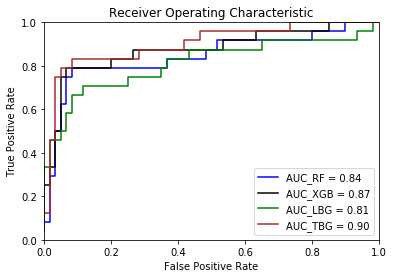

In [46]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'blue', label = 'AUC_RF = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'black', label = 'AUC_XGB = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'green', label = 'AUC_LBG = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'brown', label = 'AUC_TBG = %0.2f' % roc_auc4)
#plt.plot(fpr5, tpr5, 'red', label = 'AUC_MLP = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()